In [252]:
import pandas as pd
from numpy import arange
import math 
import matplotlib.pyplot as plt
import numpy as np

TARGET_FILE = 'final.csv'

file = pd.read_csv(TARGET_FILE, encoding = "ISO-8859-1")

test_data = file.loc[file["VCE Median Study Score"] >= 0]

test_data = test_data.loc[test_data["Median Income in Postcode"] >= 0]

def pearson_coefficient(df):
    return df[df.columns[0]].corr(df[df.columns[1]])


def entropy(probs):
    return -probs.dot(np.log2(probs))


def mutual_info(dataframe):
    Hx = entropy(dataframe.iloc[:,0].value_counts(normalize=True, sort=False))
    Hy = entropy(dataframe.iloc[:,1].value_counts(normalize=True, sort=False))
    
    counts = dataframe.groupby([dataframe.columns[0],dataframe.columns[1]]).size()
    probs = counts/ counts.values.sum()
    H_xy = entropy(probs)

    I_xy = Hx + Hy - H_xy
    MI = I_xy
    NMI = I_xy/min(Hx,Hy) 
    
    return {'Hx':Hx,'Hy':Hy,'MI':MI,'NMI':NMI} 


In [253]:
# assign thresholds manually based on domain knowledge
# 4 bins: 1st bin [-inf, 40000) "Low", 2nd bin [40000, 50000) "Medium", 3rd bin [50000, 60000) "High", 4th bin [60000, inf) "Sup"
MedianIncome = []
for x in list(test_data["Median Income in Postcode"]):
    if (x < 40000):
        MedianIncome.append(1)
    elif (x >= 40000 and x < 50000):
        MedianIncome.append(2)  
    elif (x >= 50000 and x < 60000):
        MedianIncome.append(3)
    elif (x >= 60000):
        MedianIncome.append(4)
MedianIncome.sort()

# equal lenght binning
# 4 bins: 1st bin [20, 25) Low, 2nd bin [25, 30) Medium, 3rd bin [30,35) High, 4th bin [35, 40) Superior
MedianScore = []
for k in list(test_data["VCE Median Study Score"]):
    if (k >= 20 and k < 25):
        MedianScore.append(1)
    elif (k >= 25 and k < 30):
        MedianScore.append(2)
    elif (k >= 30 and k < 35):
        MedianScore.append(3)
    elif (k >= 35 and k < 40):
        MedianScore.append(4)
MedianScore.sort()


# equal lenght binning
# 4 bins: 1st bin [20, 25) Low, 2nd bin [25, 30) Medium, 3rd bin [30,35) High, 4th bin [35, 40) Superior
Score40 = []
for i in list(test_data["Percentage of study scores of 40 and over"]):
    if (i >= 0 and i < 10):
        Score40.append(1)
    elif (i >= 10 and i < 20):
        Score40.append(2)
    elif (i >= 20 and i < 30):
        Score40.append(3)
    elif (i >= 30 and i < 40):
        Score40.append(4)
Score40.sort()

In [254]:
med_income_vs_med_score = pd.DataFrame({"Median Income": MedianIncome, "VCE Median Study Score": MedianScore})
med_income_vs_40_score = pd.DataFrame({"Median Income": MedianIncome, "Percentage of study scores of 40 and over": Score40})

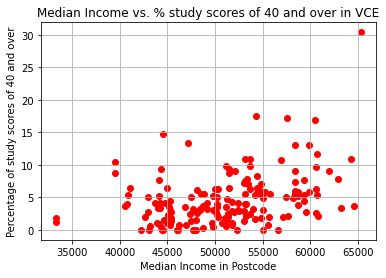

The Pearson Coefficient r is:
 0.37885997431313806


The Mutual Information are:
 {'Hx': 1.4326729204205513, 'Hy': 0.4391321996120988, 'MI': 0.36322538891956624, 'NMI': 0.8271436010395417}


In [255]:
plt.scatter(test_data["Median Income in Postcode"],test_data["Percentage of study scores of 40 and over"], color = "red")
plt.grid(True)
plt.xlabel("Median Income in Postcode")
plt.ylabel("Percentage of study scores of 40 and over")
plt.title("Median Income vs. % study scores of 40 and over in VCE")
plt.show()

pear_coe_2 = test_data["Median Income in Postcode"].corr(test_data["Percentage of study scores of 40 and over"])
mut_inf_2 = mutual_info(med_income_vs_40_score)
print("The Pearson Coefficient r is:\n", pear_coe_2)
print("\n");
print("The Mutual Information are:\n", mut_inf_2)

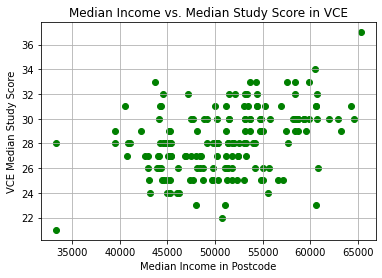

The Pearson Coefficient r is:
 0.3979223971750898


The Mutual Information are:
 {'Hx': 1.4326729204205513, 'Hy': 1.275770612661683, 'MI': 0.5438550890193556, 'NMI': 0.4262953571917545}


In [256]:
plt.scatter(test_data["Median Income in Postcode"],test_data["VCE Median Study Score"], color = "green")
plt.grid(True)
plt.xlabel("Median Income in Postcode")
plt.ylabel("VCE Median Study Score")
plt.title("Median Income vs. Median Study Score in VCE")
plt.show()

pear_coe_1 = test_data["Median Income in Postcode"].corr(test_data["VCE Median Study Score"])
mut_inf_1 = mutual_info(med_income_vs_med_score)
print("The Pearson Coefficient r is:\n", pear_coe_1)
print("\n");
print("The Mutual Information are:\n", mut_inf_1)